# Honey Production

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [3]:
df = pd.read_csv('honeyproduction.csv')

In [4]:
df.head(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998


In [5]:
# df.info()

#### For now, we care about the total production of honey per year.

In [6]:
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [7]:
# Setting Variables
# mean to totalprod per year 
# reset the index
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head(2)

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06


#### Define x and y
reshaping 

In [39]:
# Independent
X = prod_per_year['year'].values.reshape(-1,1)

# Dependent
y = prod_per_year['totalprod'].values.reshape(-1,1)

#### Create and Fit a Linear Regression Model

In [40]:
regr = linear_model.LinearRegression()

In [49]:
# Fitting the model
regr.fit(X,y)
y_predict = regr.predict(X)

#### Actual Vs Prediction

Text(0, 0.5, 'Production Mean')

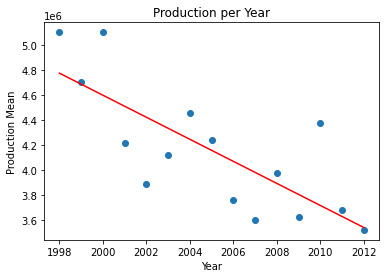

In [50]:
# Visiualize
plt.scatter(X,y)
plt.plot(X,y_predict, '-r')
plt.title('Production per Year')
plt.xlabel('Year')
plt.ylabel('Production Mean')

In [51]:
# Actual Vs. Expected
resultx = X.flatten()
resulty = y.flatten()
resultyp = y_predict.flatten()

year1 = resultx
prod1 = resulty
expect = resultyp

sim_data={"Years":year1,"Actual Production":prod1, 'Expected Production':expect}
sim_data=pd.DataFrame(sim_data)

sim_data.head(3)

,Years,Actual Production,Expected Production
0,1998,5.105093e+06,4.778311e+06
1,1999,4.706674e+06,4.690008e+06
2,2000,5.106000e+06,4.601705e+06


#### So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2012 - 2050 may look like in terms of honey production.

In [52]:
X_future = np.array(range(2012,2051))
X_future = X_future.reshape(-1,1)

In [55]:
X_future_predict = regr.predict(X_future)

# # Testing
# # 2012 and 2050 prediction
# X_future_predict[0:1], X_future_predict[-1]

(array([[3542066.53273734]]), array([186545.34494683]))

(2012.0, 2050.0)

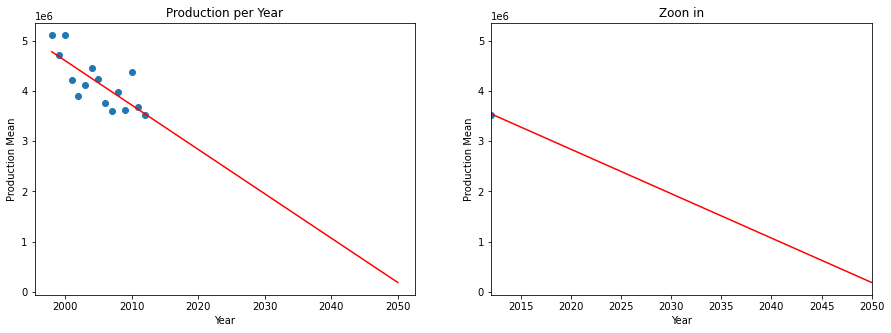

In [56]:
# plt.scatter(X,y)
plt.figure(figsize=(15, 5)) 

ax1 = plt.subplot(1,2,1)
plt.scatter(X,y)
plt.plot(X,y_predict, '-r')

plt.plot(X_future, X_future_predict, '-r')
plt.title('Production per Year')
plt.xlabel('Year')
plt.ylabel('Production Mean')

ax2 = plt.subplot(1,2,2)
plt.scatter(X,y)
plt.plot(X,y_predict, '-r')

plt.plot(X_future, X_future_predict, 'r')
plt.title('Zoon in')
plt.xlabel('Year')
plt.ylabel('Production Mean')

plt.xlim(2012, 2050)

#### Year to come Prediction
I included 2012 observation for data consistency

In [16]:
#
result = X_future_predict.flatten()

year = range(2012,2051)
prod = result

sim_data={"Year to come":year,"Expected Production":prod}
sim_data=pd.DataFrame(sim_data)

sim_data.head(3)

NameError: name 'X_future_predict' is not defined

# Evaluating the Model's Accuracy

In [17]:
# Total residuals
u = ((y - y_predict) ** 2).sum()
# TSS
v = ((y - y.mean()) ** 2).sum()
# R^2 Score
1 - u/v

NameError: name 'y_predict' is not defined

#### Using .score() method
Using manual computation and .score() method results are the same.

In [18]:
model.score(X,y)

0.5845502894391816

#### Corelation

In [19]:
from scipy.stats import pearsonr
corr_X = prod_per_year['year']
corr_y = prod_per_year['totalprod']

corr, p = pearsonr(corr_X, corr_y)
print(corr, p)

-0.7645588855275872 0.0009011433746602362


NameError: name 'sns' is not defined

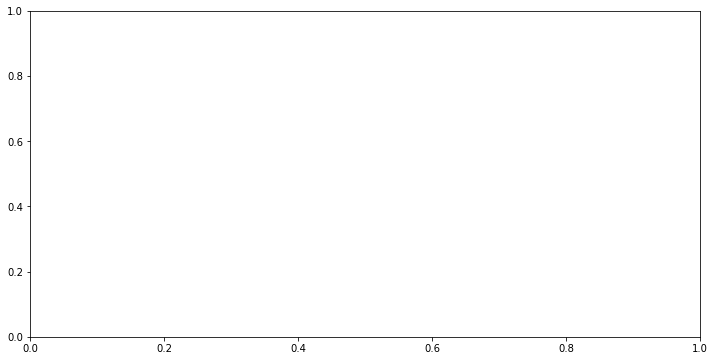

In [20]:
#create subplots
plt.subplots(figsize = (12,6))

#plot actual values
sns.scatterplot(x=test_x['Percent Under 21'], y=test_y['Fatal Accidents per 1000'], s = 100, alpha = .5)

#plot predicted values
x_test = test_x.reset_index(drop=True)
sns.scatterplot(x=x_test['Percent Under 21'], y=prediction['Predicted Fatal Accidents per 1000'], s = 100)

#add customize
plt.legend(['Actual', 'Predicted'])
plt.title('Actual and Predicted Values', y = 1.02)

#display
plt.show()